# Gini Coefficient Calculation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Generate Random Data

In [2]:
incomes = np.array([10, 5, 4, 9, 8, 3, 1, 2, 9, 3])
totalPopulation = len(incomes)
totalPopulation

10

In [3]:
incomes

array([10,  5,  4,  9,  8,  3,  1,  2,  9,  3])

## Lorenz curve
* The lorenz curve gives the proportion of the total income of the population (y-axis) that is cumulatively earned by the bottom x of the population (x-axis)

In [4]:
# sort people by their incomes
incomes.sort()

In [5]:
incomes

array([ 1,  2,  3,  3,  4,  5,  8,  9,  9, 10])

In [6]:
cummulative_incomes = np.array([])
cummulative_incomes = np.append(cummulative_incomes, 0);
for idx in range(1,totalPopulation):
    cummulative_incomes = np.append(cummulative_incomes, cummulative_incomes[idx-1] + incomes[idx-1])
cummulative_incomes = np.append(cummulative_incomes, cummulative_incomes[totalPopulation-1] + incomes[totalPopulation-1])
cummulative_incomes

array([ 0.,  1.,  3.,  6.,  9., 13., 18., 26., 35., 44., 54.])

### Plot the lorenz and equality curves

In [7]:
bottom_x_of_population = np.arange(0, totalPopulation+1)

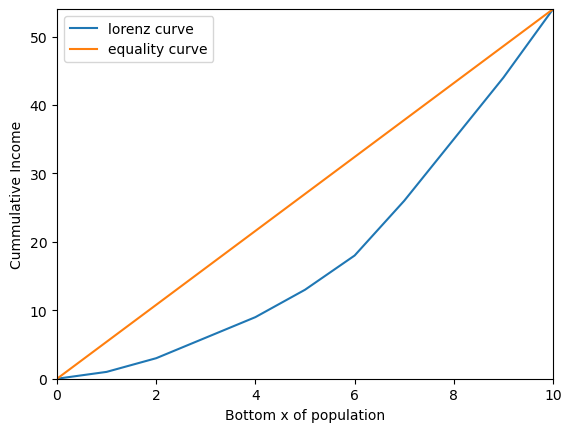

In [8]:
plt.plot(bottom_x_of_population, cummulative_incomes, label = 'lorenz curve')
plt.plot([0, totalPopulation], [0, cummulative_incomes[-1]], label = 'equality curve')
plt.xlim([0, totalPopulation])
plt.ylim([0, cummulative_incomes[-1]])
plt.ylabel("Cummulative Income")
plt.xlabel("Bottom x of population")
plt.legend()
plt.show()

### Calculate areas under lorenz curve and equality curve

* Area under the lorenz curve can be calculated by adding a rectangle area (see first term in summation below) and a triangle area (see second term in summation):
$$\sum_{i=0}^{totalPopulation - 1} (array[i-1] * 1) + (0.5 * (array[i] - array[i-1]))$$

In [9]:
# rectangle_areas = cummulative_incomes.sum() - cummulative_incomes[-1]
rectangle_areas = 0
for idx in range(1,totalPopulation):
    rectangle_areas += cummulative_incomes[idx]
rectangle_areas

155.0

In [10]:
traingle_areas = 0
for idx in range(1,totalPopulation+1):
    traingle_areas += 0.5 * (cummulative_incomes[idx]-cummulative_incomes[idx-1])
traingle_areas

27.0

In [11]:
lorenz_area = rectangle_areas + traingle_areas
lorenz_area

182.0

In [12]:
equality_area = 0.5 * (totalPopulation) * cummulative_incomes[-1] # half base times height
equality_area

270.0

## Gini Coefficient

In [13]:
gini_coefficient = (equality_area - lorenz_area)/equality_area
gini_coefficient

0.32592592592592595